In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dataset.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df = df.drop(['UDI','Product ID','Type','Failure Type'],axis = 1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


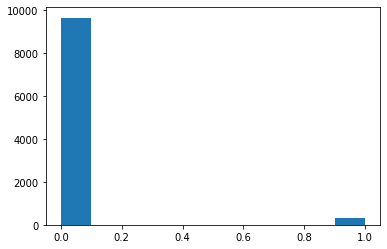

In [ ]:
plt.hist(df.loc[:,'Target'])
plt.show()

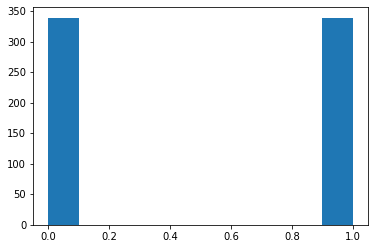

In [ ]:
df_ones = df[df.loc[:,'Target'].values==1]

df_zeros = df[df.loc[:,'Target'].values==0]
df_zeros = df_zeros.sample(n=len(df_ones))

df_merged = pd.concat([df_ones, df_zeros])

df_shuffled = df_merged.sample(frac=1)

plt.hist(df_shuffled.loc[:,'Target'])
plt.show()

In [ ]:
df_shuffled.to_csv('dataset_prepped.csv', index=False, header=False)

# Model training

In [ ]:
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import plot_model

In [ ]:
dataset = loadtxt('dataset_prepped.csv', delimiter=',')

input = dataset[:500,0:5]
output = dataset[:500,5]

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(5,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(input, output, epochs=100, batch_size=5)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 25.0883 - accuracy: 0.5380
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 5.5240 - accuracy: 0.6180
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 1.9423 - accuracy: 0.6860
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 5.3659 - accuracy: 0.6820
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 1.8712 - accuracy: 0.6820
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 2.8600 - accuracy: 0.6900
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 2.1092 - accuracy: 0.7060
Epoch 8/100
100/100 [==============================] - 0s 3ms/step - loss: 1.9393 - accuracy: 0.7280
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 1.3206 - accuracy: 0.7620
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 1.1685 - accur

In [ ]:
_, accuracy = model.evaluate(input, output)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8360
Accuracy: 83.60


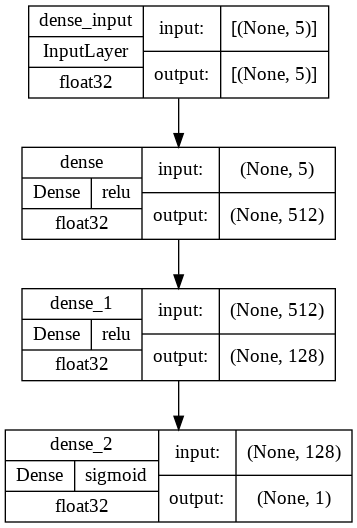

In [ ]:
plot_model(model, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    expand_nested=True,
    dpi=96,
    show_layer_activations=True)

In [ ]:
model.save('model.h5')

# Testing (Prediction)

In [ ]:
from sklearn import metrics

In [ ]:
input = dataset[501:,0:5]
output = dataset[501:,5]

In [ ]:
probabilities = model.predict(input)

6/6 [==============================] - 0s 3ms/step


In [ ]:
predictions = []
confidence = []
for prob in probabilities:
    if prob > 0.5:
        predictions.append(1)
        confidence.append(prob)
    else:
        predictions.append(0)
        confidence.append(1-prob)
correct = 0
wrong = 0
false_positives = 0
false_negatives = 0

for i,_ in enumerate(predictions):
    if predictions[i] == output[i]:
        correct = correct +1
    else:
      if predictions[i] == 1:
        false_positives += 1
      else:
        false_negatives += 1
      wrong = wrong +1

for i in range(20):
    print('%s => %d (expected %d) Confidence: %f' % (input[i].tolist(), predictions[i], output[i], confidence[i]))

print('False: %d (Positives: %d, Negatives: %d), Correct: %d , Accuracy: %d' % (wrong,false_positives,false_negatives,correct,((correct/(wrong+correct))*100)))

[303.4, 312.6, 2706.0, 9.8, 65.0] => 1 (expected 1) Confidence: 0.966551
[299.6, 310.1, 1531.0, 36.8, 62.0] => 0 (expected 0) Confidence: 0.987734
[297.6, 309.5, 1617.0, 36.2, 42.0] => 0 (expected 0) Confidence: 0.996206
[300.7, 309.5, 1470.0, 48.7, 21.0] => 0 (expected 0) Confidence: 0.836197
[300.3, 311.2, 1783.0, 25.6, 139.0] => 0 (expected 0) Confidence: 0.937433
[300.3, 309.2, 1462.0, 51.4, 48.0] => 0 (expected 0) Confidence: 0.818865
[298.7, 309.9, 1593.0, 42.5, 146.0] => 0 (expected 0) Confidence: 0.969099
[302.2, 311.3, 1510.0, 36.6, 91.0] => 0 (expected 0) Confidence: 0.979685
[298.2, 307.6, 1511.0, 31.0, 209.0] => 0 (expected 1) Confidence: 0.619002
[297.9, 307.4, 1606.0, 35.5, 14.0] => 0 (expected 0) Confidence: 0.996632
[302.2, 311.2, 1544.0, 43.6, 63.0] => 0 (expected 0) Confidence: 0.984954
[302.9, 311.2, 1330.0, 53.7, 200.0] => 1 (expected 1) Confidence: 0.918565
[300.5, 309.3, 1475.0, 46.8, 94.0] => 0 (expected 0) Confidence: 0.932094
[302.1, 310.6, 1421.0, 52.0, 95.0] 

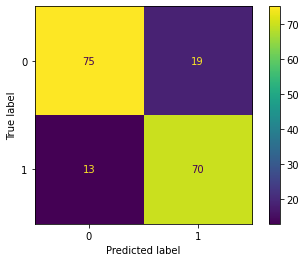

In [ ]:
confusion_matrix = metrics.confusion_matrix(predictions, output)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0,1,2,3,4])

cm_display.plot()
plt.show()